In [59]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
def box_plot(data, headers, title, y_labels=None):
    fig, ax = plt.subplots()
    fig.dpi = 100.0
    ax.set_title(title)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticklabels(headers)
    if y_labels is not None:
        ax.set_yticklabels(y_labels)
    ax.boxplot(data)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# Import covid rumour predictions
covid_df = pd.read_csv('covid_predictions_dataframe.csv')

In [4]:
covid_df.head()

,tweet_id,text,time,parent,follower_count,user_id,label
0,1272262651100434433,"According to the New York Times, Warner Bros. ...",Sun Jun 14 20:20:28 +0000 2020,NaN,26179,1011312260805996547,rumour
1,1287153210990395392,Hurricane Hanna has made landfall in Texas.\n\...,Sat Jul 25 22:30:14 +0000 2020,NaN,248090,44513878,non-rumour
2,1287191952115605505,@TexasTribune Guess what the cause of death is...,Sun Jul 26 01:04:10 +0000 2020,1.287153e+18,1,1266937699128217602,non-rumour
3,1266555444283179008,Monkeys on the loose in India with stolen coro...,Sat May 30 02:22:04 +0000 2020,NaN,3948552,1917731,rumour
4,1257715199655755779,Eastleigh and Swahili Arabs in Mombasa where c...,Tue May 05 16:54:05 +0000 2020,NaN,176217,4811676473,non-rumour


In [5]:
# Split rumour and non rumour datasets
rumour_covid = covid_df.loc[covid_df['label'] == 'rumour']
non_rumour_covid = covid_df.loc[covid_df['label'] == 'non-rumour']

## Topic Modelling using LDA

In [6]:
print(rumour_covid.shape)
print(non_rumour_covid.shape)

(6414, 7)
(248267, 7)


In [7]:
# Pre-processing data

# Remove punct & convert to lowercase
rumour_covid['text_processed'] = rumour_covid['text'].map(lambda x: re.sub('[,\.!?]', '', x))
rumour_covid['text_processed'] = rumour_covid['text_processed'].map(lambda x: x.lower())

# Remove punct & convert to lowercase
non_rumour_covid['text_processed'] = non_rumour_covid['text'].map(lambda x: re.sub('[,\.!?]', '', x))
non_rumour_covid['text_processed'] = non_rumour_covid['text_processed'].map(lambda x: x.lower())

<ipython-input-7-b03693e5fd88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumour_covid['text_processed'] = rumour_covid['text'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-7-b03693e5fd88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumour_covid['text_processed'] = rumour_covid['text_processed'].map(lambda x: x.lower())
<ipython-input-7-b03693e5fd88>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

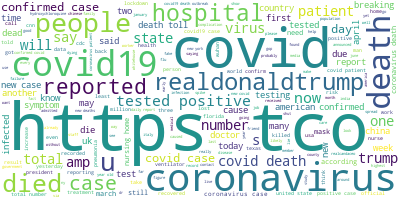

In [8]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(rumour_covid['text_processed'].values))

# Create a WordCloud object
rumour_wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
rumour_wordcloud.generate(long_string)

# Visualize the word cloud
rumour_wordcloud.to_image()

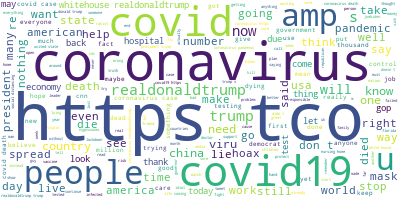

In [9]:
# Join the different processed titles together.
x_long_string = ','.join(list(non_rumour_covid['text_processed'].values))

# Create a WordCloud object
non_rumour_wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
non_rumour_wordcloud.generate(x_long_string)

# Visualize the word cloud
non_rumour_wordcloud.to_image()

In [10]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet

stop_words = stopwords.words('english')
stop_words.extend(['https', '\\'])

# rumour_data = rumour_covid.text_processed.values.tolist()
# non_rumour_data = non_rumour_covid.text_processed.values.tolist()

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
tokenizer = TweetTokenizer()

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma

def tokenize_text(data):
    out = []
    for tweet in data:
        lemma_text = []
        text = tokenizer.tokenize(tweet)
        for word in text:
            lemma = lemmatize(word)
            if lemma not in stop_words:
                lemma_text.append(lemma)
        out.append(lemma_text)
    return out

def process_tokenize(df):
    data = df.text_processed.values.tolist()
    out = tokenize_text(data)
    return out


In [11]:
import gensim
import gensim.corpora as corpora
from pprint import pprint

import pyLDAvis.gensim

def topics(data):
    id2word = corpora.Dictionary(data)
    tokens = data
    corpus = [id2word.doc2bow(token) for token in tokens]
    
    num_topics = 5
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
    
    # Print the Keywords in the 5 topics
    
    return lda_model.print_topics()

   

rumour_processed_data = process_tokenize(rumour_covid)
non_rumour_processed_data = process_tokenize(non_rumour_covid)

rumour_topics = topics(rumour_processed_data)
non_rumour_topics = topics(non_rumour_processed_data)



C:\Users\benja\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\benja\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [12]:
print("RUMOUR TOPICS")
pprint(rumour_topics)
print("")
print("NON RUMOUR TOPICS")
pprint(non_rumour_topics)

RUMOUR TOPICS
[(0,
  '0.027*"covid" + 0.024*"19" + 0.021*"-" + 0.014*"death" + 0.010*""" + '
  '0.010*"coronavirus" + 0.010*":" + 0.009*"report" + 0.008*")" + 0.007*"("'),
 (1,
  '0.031*"-" + 0.026*"covid" + 0.026*"19" + 0.019*"case" + 0.016*":" + '
  '0.015*"death" + 0.011*"coronavirus" + 0.009*"test" + 0.009*"report" + '
  '0.009*"new"'),
 (2,
  '0.024*"19" + 0.024*"-" + 0.023*"covid" + 0.019*"death" + '
  '0.014*"coronavirus" + 0.010*":" + 0.010*"die" + 0.010*"case" + '
  '0.007*"confirm" + 0.007*"state"'),
 (3,
  '0.020*"19" + 0.020*"covid" + 0.017*"death" + 0.015*"-" + 0.012*"case" + '
  '0.012*"test" + 0.011*"#covid19" + 0.010*"coronavirus" + 0.010*"people" + '
  '0.009*":"'),
 (4,
  '0.029*"-" + 0.022*"coronavirus" + 0.016*"19" + 0.015*"covid" + 0.014*"test" '
  '+ 0.012*"death" + 0.010*":" + 0.008*"case" + 0.007*""" + 0.007*"positive"')]

NON RUMOUR TOPICS
[(0,
  '0.023*"@realdonaldtrump" + 0.021*"covid" + 0.020*"coronavirus" + 0.020*"19" '
  '+ 0.013*"-" + 0.011*"people" + 0.0

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Analysis

Rumour tweets: More death topics

Non-rumour tweets are responses to @realdonaldtrump?

In [13]:
# import pyLDAvis.gensim_models
# import pyLDAvis.gensim
# import pickle 
# import pyLDAvis

# # Visualize the topics
# pyLDAvis.enable_notebook()

# dash = pyLDAvis.gensim.prepare(rumour_lda_model, rumour_corpus, rumour_id2word)

# dash

# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself
# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     with open(LDAvis_data_filepath, 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)

# # load the pre-prepared pyLDAvis data from disk
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)

# pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

# LDAvis_prepared

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Popular hashtags

In [14]:
from collections import Counter
rumour_hash = Counter()
non_rumour_hash = Counter()

for line in rumour_processed_data:
    for word in line:
        if word[0] == '#':
            rumour_hash[word] += 1
            
for line in non_rumour_processed_data:
    for word in line:
        if word[0] == '#':
            non_rumour_hash[word] += 1
# rumour_processed_data


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
rumour_hash.most_common(5)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('#covid19', 985),
 ('#coronavirus', 375),
 ('#covid_19', 74),
 ('#covid_19india', 68),
 ('#', 55)]

In [16]:
non_rumour_hash.most_common(5)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('#covid19', 32596),
 ('#coronavirus', 18441),
 ('#trump', 2551),
 ('#', 1611),
 ('#coronaviruspandemic', 1606)]

In [17]:
non_rumour_words = Counter()
for line in non_rumour_processed_data:
    for word in line:
        non_rumour_words[word] += 1

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
non_rumour_words.most_common(5)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('covid', 99239),
 ('19', 97386),
 ('@realdonaldtrump', 85933),
 ('coronavirus', 84974),
 ('-', 81131)]

#### Analysis

Similar hashtags. However, seems that hashtags that involve india are predicted as rumours and trump, non-rumours 

## Rumour Creating Users Characteristics

In [19]:
# rumour_covid

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Follower count Differences

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
rumour_follower_v = list(rumour_covid.follower_count.values)
non_rumour_follower_v = list(non_rumour_covid.follower_count.values)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
print("Rumour Mean Follower Count:", np.mean(rumour_follower_v))
print("Rumour Median Follower Count:", np.median(rumour_follower_v))
print("Non Rumour Mean Follower Count:", np.mean(non_rumour_follower_v))
print("Non Rumour Median Follower Count:", np.median(non_rumour_follower_v))


Rumour Mean Follower Count: 1065973.4212659807
Rumour Median Follower Count: 938.5
Non Rumour Mean Follower Count: 355464.1189203559
Non Rumour Median Follower Count: 305.0


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
max(non_rumour_follower_v)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


123153277

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-5df693ce45d0>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(headers)


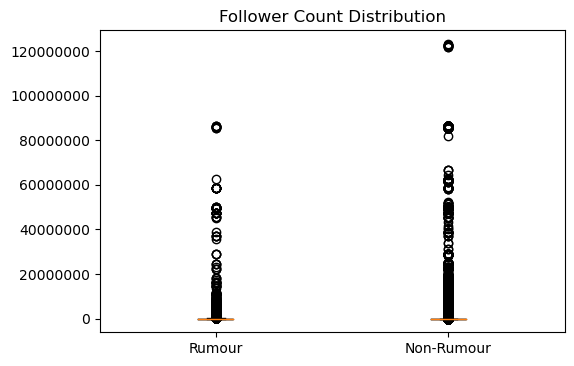

In [72]:
follower_data = rumour_follower_v, non_rumour_follower_v

follower_headers = ['Rumour', 'Non-Rumour']
follower_title = 'Follower Count Distribution'

box_plot(follower_data, follower_headers, follower_title)



#### Analysis

Rumour creating users are seen to have more followers vs non rumour creating accounts based on the predictions made by language model on tweets

## Sentiment Intensity Analysis

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# rumour_covid['text_processed'][0]

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
sid = SentimentIntensityAnalyzer()

def get_sentiment_score(text_processed):
    out = []
    for line in text_processed:
        score = sid.polarity_scores(line)
        out.append(score['compound'])
    return out

def get_sentiment_score_ind(text):

    return sid.polarity_scores(text)['compound']

# nltk.download('vader_lexicon')


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### All Tweets

In [28]:
# Sentiment of all tweets
rumour_sentiment = get_sentiment_score(rumour_covid['text_processed'])
non_rumour_sentiment = get_sentiment_score(non_rumour_covid['text_processed'])


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
print('Mean Rumour Sentiment:', np.mean(rumour_sentiment))
print('Median Rumour Sentiment:', np.median(rumour_sentiment))
print('Mean Non Rumour Sentiment:', np.mean(non_rumour_sentiment))
print('Median Non Rumour Sentiment:', np.median(non_rumour_sentiment))



Mean Rumour Sentiment: -0.15141100717181163
Median Rumour Sentiment: -0.0516
Mean Non Rumour Sentiment: -0.14302270619937407
Median Non Rumour Sentiment: -0.0772


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-01270e8b053a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(headers)


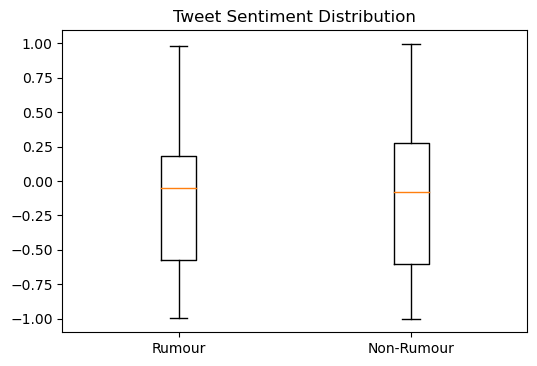

In [30]:
all_sent_data = rumour_sentiment, non_rumour_sentiment
all_sent_headers = ['Rumour', 'Non-Rumour']
all_sent_title = 'Tweet Sentiment Distribution'

box_plot(all_sent_data, all_sent_headers, all_sent_title)

#### Analysis:
Tweet sentiment for rumour and non rumour tweets are similar. Both negative

#### Parent and Child Tweets

In [31]:
# Sentiment of source tweets

# Split rumour and non rumour datasets based on parent or replies
parent_rumour_covid = rumour_covid.loc[rumour_covid['parent'].isnull()]
child_rumour_covid = rumour_covid.loc[rumour_covid['parent'].notnull()]

parent_non_rumour_covid = non_rumour_covid.loc[non_rumour_covid['parent'].isnull()]
child_non_rumour_covid = non_rumour_covid.loc[non_rumour_covid['parent'].notnull()]




C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Rumours

parent_rumour_sentiment = get_sentiment_score(parent_rumour_covid['text_processed'])
child_rumour_sentiment = get_sentiment_score(child_rumour_covid['text_processed'])

print('Rumours')
print('Mean Parent Rumour Sentiment:', np.mean(parent_rumour_sentiment))
print('Median Parent Rumour Sentiment:', np.median(parent_rumour_sentiment))
print('Mean Child Rumour Sentiment:', np.mean(child_rumour_sentiment))
print('Median Child Rumour Sentiment:', np.median(child_rumour_sentiment))

# print('Mean Non Rumour Sentiment:', np.mean(non_rumour_sentiment))
# print('Median Non Rumour Sentiment:', np.median(non_rumour_sentiment))

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rumours
Mean Parent Rumour Sentiment: -0.02899872448979592
Median Parent Rumour Sentiment: 0.0
Mean Child Rumour Sentiment: -0.1910194387123401
Median Child Rumour Sentiment: -0.17520000000000002


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-01270e8b053a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(headers)


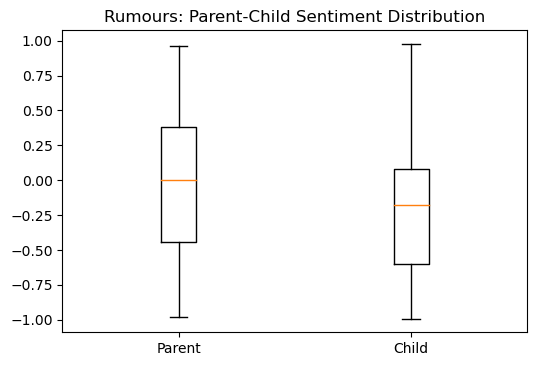

In [33]:
rumour_sent_data = parent_rumour_sentiment, child_rumour_sentiment
rumour_sent_headers = ['Parent', 'Child']
rumour_sent_title = 'Rumours: Parent-Child Sentiment Distribution'

box_plot(rumour_sent_data, rumour_sent_headers, rumour_sent_title)

In [34]:
# Non Rumours

parent_non_rumour_sentiment = get_sentiment_score(parent_non_rumour_covid['text_processed'])
child_non_rumour_sentiment = get_sentiment_score(child_non_rumour_covid['text_processed'])

print('Non-rumours')
print('Mean Parent Non Rumour Sentiment:', np.mean(parent_non_rumour_sentiment))
print('Median Parent Non Rumour Sentiment:', np.median(parent_non_rumour_sentiment))
print('Mean Child Non Rumour Sentiment:', np.mean(child_non_rumour_sentiment))
print('Median Child Non Rumour Sentiment:', np.median(child_non_rumour_sentiment))

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Non-rumours
Mean Parent Non Rumour Sentiment: -0.02747912523599748
Median Parent Non Rumour Sentiment: 0.0
Mean Child Non Rumour Sentiment: -0.1509236064670772
Median Child Non Rumour Sentiment: -0.1027


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-01270e8b053a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(headers)


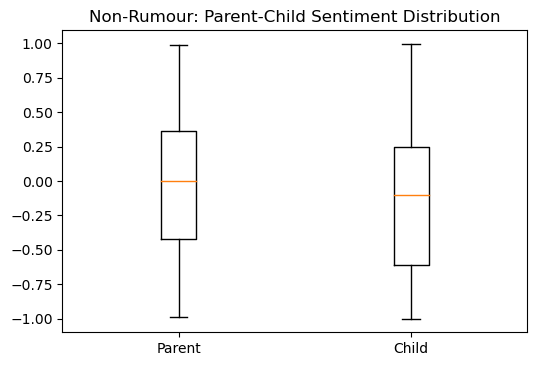

In [35]:
non_rumour_sent_data = parent_non_rumour_sentiment, child_non_rumour_sentiment
non_rumour_sent_headers = ['Parent', 'Child']
non_rumour_sent_title = 'Non-Rumour: Parent-Child Sentiment Distribution'

box_plot(non_rumour_sent_data, non_rumour_sent_headers, non_rumour_sent_title)

##### Analysis

In both rumour and non rumour tweets, parent tweets have less negative sentiment than child tweets

In [36]:
## Get max sent impact example?

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Sentiment over time?

In [37]:
rumour_covid['time'][3]

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Sat May 30 02:22:04 +0000 2020'

In [38]:
import time
from time import strptime
from datetime import datetime
from time import mktime

a = strptime('Sun Jun 14 20:20:28 +0000 2020', '%a %b %d %H:%M:%S %z %Y')
b = strptime('Sat May 30 02:22:04 +0000 2020', '%a %b %d %H:%M:%S %z %Y')

a > b

dt = datetime.fromtimestamp(mktime(a))
dt

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.datetime(2020, 6, 14, 20, 20, 28)

In [39]:
rumour_time_df = rumour_covid.copy()
non_rumour_time_df = non_rumour_covid.copy()

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# time_df

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
def time_process(time_df):
    
    time_df['struct_time'] = time_df['time'].apply(lambda x: strptime(x, '%a %b %d %H:%M:%S %z %Y'))
    time_df['datetime'] = time_df['struct_time'].apply(lambda x: datetime.fromtimestamp(mktime(x)))

    # time_df = time_df.sort_values(by=['struct_time'])
    time_df['sentiment'] = time_df['text'].apply(lambda x: get_sentiment_score_ind(x))
    
    return time_df

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
rumour_time_df = time_process(rumour_time_df)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
non_rumour_time_df = time_process(non_rumour_time_df)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


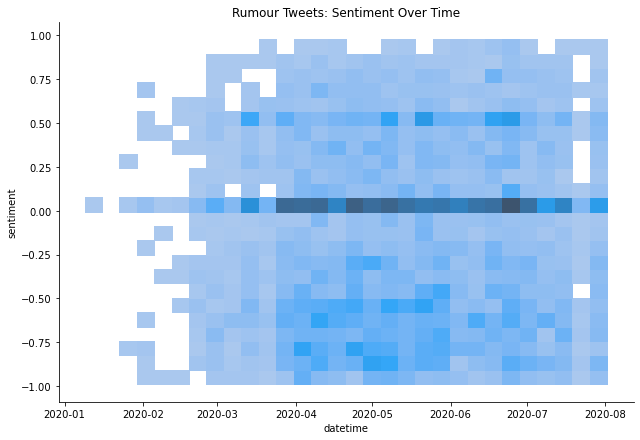

In [44]:


sns.displot(data=rumour_time_df[['datetime', 'sentiment']], x="datetime", y="sentiment", height=6, aspect=1.5).set(title='Rumour Tweets: Sentiment Over Time')

# plt.show()

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


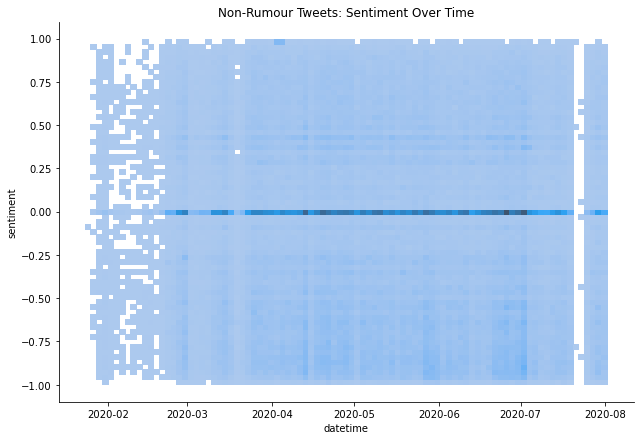

In [45]:
sns.displot(data=non_rumour_time_df[['datetime', 'sentiment']], x="datetime", y="sentiment", height=6, aspect=1.5).set(title='Non-Rumour Tweets: Sentiment Over Time')

#### Analysis

No Clear change in sentiment distribution over time for both rumour and non rumour

## Topics Over Time

#### Rumour Tweets

In [46]:
# rumour_time_df[(rumour_time_df.datetime > '08:00') & (rumour_time_df.datetime < '20:00')]
# rumour_time_df[(rumour_time_df.datetime.between_time('08:00', '12:00'))]

rumour_time_df_1 = rumour_time_df[(rumour_time_df.datetime > "2020-01") & (rumour_time_df.datetime < "2020-02")]
rumour_time_df_2 = rumour_time_df[(rumour_time_df.datetime > "2020-02") & (rumour_time_df.datetime < "2020-03")]
rumour_time_df_3 = rumour_time_df[(rumour_time_df.datetime > "2020-03") & (rumour_time_df.datetime < "2020-04")]
rumour_time_df_4 = rumour_time_df[(rumour_time_df.datetime > "2020-04") & (rumour_time_df.datetime < "2020-05")]
rumour_time_df_5 = rumour_time_df[(rumour_time_df.datetime > "2020-05") & (rumour_time_df.datetime < "2020-06")]
rumour_time_df_6 = rumour_time_df[(rumour_time_df.datetime > "2020-06") & (rumour_time_df.datetime < "2020-07")]
rumour_time_df_7 = rumour_time_df[(rumour_time_df.datetime > "2020-07") & (rumour_time_df.datetime < "2020-08")]

# df = df[(df['Date']> "2018-01-01"

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
rumour_time_df_1_topics = topics(process_tokenize(rumour_time_df_1))
rumour_time_df_2_topics = topics(process_tokenize(rumour_time_df_2))
rumour_time_df_3_topics = topics(process_tokenize(rumour_time_df_3))
rumour_time_df_4_topics = topics(process_tokenize(rumour_time_df_4))
rumour_time_df_5_topics = topics(process_tokenize(rumour_time_df_5))
rumour_time_df_6_topics = topics(process_tokenize(rumour_time_df_6))
rumour_time_df_7_topics = topics(process_tokenize(rumour_time_df_7))


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
print('2020-1')
pprint(rumour_time_df_1_topics)
print('2020-2')
pprint(rumour_time_df_2_topics)
print('2020-3')
pprint(rumour_time_df_3_topics)
print('2020-4')
pprint(rumour_time_df_4_topics)
print('2020-5')
pprint(rumour_time_df_5_topics)
print('2020-6')
pprint(rumour_time_df_6_topics)
print('2020-7')
pprint(rumour_time_df_7_topics)


2020-1
[(0,
  '0.024*"coronavirus" + 0.023*":" + 0.019*"go" + 0.016*"wuhan" + 0.016*"’" + '
  '0.016*"trump" + 0.015*"say" + 0.014*"\u200d" + 0.014*"️" + 0.014*"🤦"'),
 (1,
  '0.033*"coronavirus" + 0.033*"case" + 0.032*"confirm" + 0.025*""" + '
  '0.025*":" + 0.015*"philippine" + 0.013*"china" + 0.013*"-" + 0.012*"trump" '
  '+ 0.012*"first"'),
 (2,
  '0.013*"go" + 0.012*"madrid" + 0.012*"atlético" + 0.012*"#atleti" + '
  '0.012*"#transfers" + 0.012*"comeback" + 0.012*"carrasco" + 0.012*"belgian" '
  '+ 0.012*"🇪" + 0.012*"🇧"'),
 (3,
  '0.038*"coronavirus" + 0.019*"chinese" + 0.018*"pneumonia" + 0.015*"awful" + '
  '0.015*"symptom" + 0.012*"cause" + 0.011*"china" + 0.010*"case" + '
  '0.010*"agent" + 0.010*"confirm"'),
 (4,
  '0.019*"confirm" + 0.018*"year" + 0.016*"wuhan" + 0.014*"#coronavirus" + '
  '0.012*"case" + 0.012*"china" + 0.011*"go" + 0.011*"death" + 0.010*"deal" + '
  '0.010*"uk"')]
2020-2
[(0,
  '0.013*"coronavirus" + 0.011*"cdc" + 0.010*"@realdonaldtrump" + 0.009*":" + '
  

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
non_rumour_time_df_1 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-01") & (non_rumour_time_df.datetime < "2020-02")]
non_rumour_time_df_2 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-02") & (non_rumour_time_df.datetime < "2020-03")]
non_rumour_time_df_3 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-03") & (non_rumour_time_df.datetime < "2020-04")]
non_rumour_time_df_4 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-04") & (non_rumour_time_df.datetime < "2020-05")]
non_rumour_time_df_5 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-05") & (non_rumour_time_df.datetime < "2020-06")]
non_rumour_time_df_6 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-06") & (non_rumour_time_df.datetime < "2020-07")]
non_rumour_time_df_7 = non_rumour_time_df[(non_rumour_time_df.datetime > "2020-07") & (non_rumour_time_df.datetime < "2020-08")]

non_rumour_time_df_1_topics = topics(process_tokenize(non_rumour_time_df_1))
non_rumour_time_df_2_topics = topics(process_tokenize(non_rumour_time_df_2))
non_rumour_time_df_3_topics = topics(process_tokenize(non_rumour_time_df_3))
non_rumour_time_df_4_topics = topics(process_tokenize(non_rumour_time_df_4))
non_rumour_time_df_5_topics = topics(process_tokenize(non_rumour_time_df_5))
non_rumour_time_df_6_topics = topics(process_tokenize(non_rumour_time_df_6))
non_rumour_time_df_7_topics = topics(process_tokenize(non_rumour_time_df_7))

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
print('2020-1')
pprint(non_rumour_time_df_1_topics)
print('2020-2')
pprint(non_rumour_time_df_2_topics)
print('2020-3')
pprint(non_rumour_time_df_3_topics)
print('2020-4')
pprint(non_rumour_time_df_4_topics)
print('2020-5')
pprint(non_rumour_time_df_5_topics)
print('2020-6')
pprint(non_rumour_time_df_6_topics)
print('2020-7')
pprint(non_rumour_time_df_7_topics)

2020-1
[(0,
  '0.035*"coronavirus" + 0.022*"’" + 0.018*"wuhan" + 0.015*"#coronavirus" + '
  '0.010*"@realdonaldtrump" + 0.010*"go" + 0.009*"china" + 0.008*""" + '
  '0.008*"people" + 0.008*"@politico"'),
 (1,
  '0.036*"coronavirus" + 0.019*"wuhan" + 0.015*"@realdonaldtrump" + '
  '0.010*"people" + 0.010*"’" + 0.009*"china" + 0.009*"flu" + 0.008*"virus" + '
  '0.008*"%" + 0.008*"#coronavirus"'),
 (2,
  '0.027*"coronavirus" + 0.008*"come" + 0.008*"china" + 0.008*"@who" + '
  '0.007*"virus" + 0.007*":" + 0.006*"say" + 0.006*"wuhan" + 0.005*"would" + '
  '0.005*")"'),
 (3,
  '0.029*"coronavirus" + 0.024*"@realdonaldtrump" + 0.020*"wuhan" + 0.013*"’" '
  '+ 0.012*"china" + 0.010*"go" + 0.008*"trump" + 0.007*"would" + '
  '0.007*"change" + 0.007*"#coronavirus"'),
 (4,
  '0.022*"coronavirus" + 0.017*"wuhan" + 0.015*"#coronavirus" + '
  '0.012*"@realdonaldtrump" + 0.012*"china" + 0.010*"’" + 0.009*"@asapscience" '
  '+ 0.007*"go" + 0.006*"-" + 0.005*"flu"')]
2020-2
[(0,
  '0.048*"coronavirus" 

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Analysis:

Rumour Tweets: 2020-01 and 2020-02 few references to death. 2020-03 onwards, alot of topics with death

Non-rumour tweets: Similar, but less topics referring to death 

## Exploring Users who post the most tweets

In [51]:
rumour_covid["user_id"].value_counts()

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1095663272089608192    77
1228754267835707399    56
759251                 34
292558545              24
1626294277             24
                       ..
893666125               1
801253065684881408      1
607531851               1
258546506               1
15527976                1
Name: user_id, Length: 5116, dtype: int64

In [52]:
asbtext = rumour_covid[(rumour_covid['user_id'] == 1095663272089608192) & (rumour_covid['tweet_id'] == 1272022343213125632)]['text']

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
rumour_covid['text']

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         According to the New York Times, Warner Bros. ...
3         Monkeys on the loose in India with stolen coro...
33        @HeidiNBC hong kong has had under 10 deaths ev...
45        Major League Soccer COVID-19 Testing Update - ...
80        @MattHancock 'High hopes' drug Remdesivir for ...
                                ...                        
254509    @thehill Tell every contact tracer that you go...
254527    ⚠️Crazy: Houston hospital ICU data now deleted...
254601    @NadineDorries @thetimes For goodness' sake, y...
254605    @NadineDorries June 2nd, Matt Hancock told Par...
254680    @seanhannity Breaking News: What Fox News won'...
Name: text, Length: 6414, dtype: object

In [54]:
with pd.option_context('display.max_colwidth', None):
  display(asbtext)

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


25496    Covid-19 (Novel Corona Virus) Updates for 14 June 2020: \n\nAll updates of the day will be listed below👇. \n\nFollow @TimesDemocracy for the fastest Corona virus updates. \n\n#Covid_19india #Covid_19 #CoronaUpdate #COVID19India
Name: text, dtype: object

In [55]:
non_rumour_covid["user_id"].value_counts()

C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1084980649520496642    433
3069279631             376
25073877               309
759251                 287
1228754267835707399    211
                      ... 
1163760109543145472      1
2909737170               1
1260436651991539714      1
997830583601397760       1
1076465848670474240      1
Name: user_id, Length: 154015, dtype: int64

In [56]:
non_rumour_covid[(non_rumour_covid['user_id'] == 1084980649520496642)]


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tweet_id,text,time,parent,follower_count,user_id,label,text_processed
1430,1256065687623217156,@WhiteHouse @realDonaldTrump @GovMurphy No dou...,Fri May 01 03:39:31 +0000 2020,1.255894e+18,1323,1084980649520496642,non-rumour,@whitehouse @realdonaldtrump @govmurphy no dou...
1457,1256050513919070208,@WhiteHouse @realDonaldTrump @GovMurphy Pathol...,Fri May 01 02:39:13 +0000 2020,1.255894e+18,1323,1084980649520496642,non-rumour,@whitehouse @realdonaldtrump @govmurphy pathol...
2732,1268580654926749696,"@realDonaldTrump Pathological liar, corrupt cr...",Thu Jun 04 16:29:31 +0000 2020,1.268498e+18,1328,1084980649520496642,non-rumour,@realdonaldtrump pathological liar corrupt cri...
2840,1268569932448628736,"@realDonaldTrump Corruption, mass death, &amp;...",Thu Jun 04 15:46:55 +0000 2020,1.268498e+18,1328,1084980649520496642,non-rumour,@realdonaldtrump corruption mass death &amp; e...
3792,1277830438065713152,"@GOPChairwoman @realDonaldTrump Corruption, ra...",Tue Jun 30 05:04:52 +0000 2020,1.277760e+18,1334,1084980649520496642,non-rumour,@gopchairwoman @realdonaldtrump corruption rac...
...,...,...,...,...,...,...,...,...
250145,1280336559426940929,@realDonaldTrump @seanhannity @FoxNews Corrupt...,Tue Jul 07 03:03:17 +0000 2020,1.280332e+18,1335,1084980649520496642,non-rumour,@realdonaldtrump @seanhannity @foxnews corrupt...
250152,1280391676410957826,@realDonaldTrump @seanhannity @FoxNews No surp...,Tue Jul 07 06:42:18 +0000 2020,1.280332e+18,1335,1084980649520496642,non-rumour,@realdonaldtrump @seanhannity @foxnews no surp...
252695,1249569688100765696,@realDonaldTrump Thank you. #DrFauci ... \nPos...,Mon Apr 13 05:26:44 +0000 2020,1.249373e+18,1317,1084980649520496642,non-rumour,@realdonaldtrump thank you #drfauci \npos pat...
253575,1239176615717986305,@realDonaldTrump Lmao...this must be a joke or...,Sun Mar 15 13:08:22 +0000 2020,1.239006e+18,1312,1084980649520496642,non-rumour,@realdonaldtrump lmaothis must be a joke or so...


In [57]:
with pd.option_context('display.max_colwidth', None):
  display(non_rumour_covid[(non_rumour_covid['user_id'] == 1084980649520496642)& (non_rumour_covid['tweet_id'] == 1256065687623217156)]['text'])


C:\Users\benja\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1430    @WhiteHouse @realDonaldTrump @GovMurphy No doubt...\n#TrumpIsANationalDisgrace \n#TrumpIsSatan\n#TrumpIsAPos\n#TrumpIsA_DANGER_ToAmerica \n#COVID19\n#CoronavirusPandemic \nhttps://t.co/PbVJicxDFk
Name: text, dtype: object